##### This ipynb checks tools/extract_feats_given_boxes.py

In [1]:
import json
import numpy as np
import os
import os.path as osp
import sys
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 10)
from pprint import pprint
import time
import collections
import seaborn as sns
import operator
from tqdm import tqdm

#### Check Genome Meta

In [2]:
meta = json.load(open('../datasets/genome/annotations/meta.json'))

In [4]:
attributes = meta['attributes']

In [7]:
thing_classes = [c["name"] for c in sorted(meta["categories"], key=lambda x: x["id"])]
attribute_classes = [a["name"] for a in sorted(meta["attributes"], key=lambda x: x["id"])]

#### Visualize Detections Given Boxes

In [11]:
json_file = "../tmp/val2017_examples.json"
data = json.load(open(json_file))

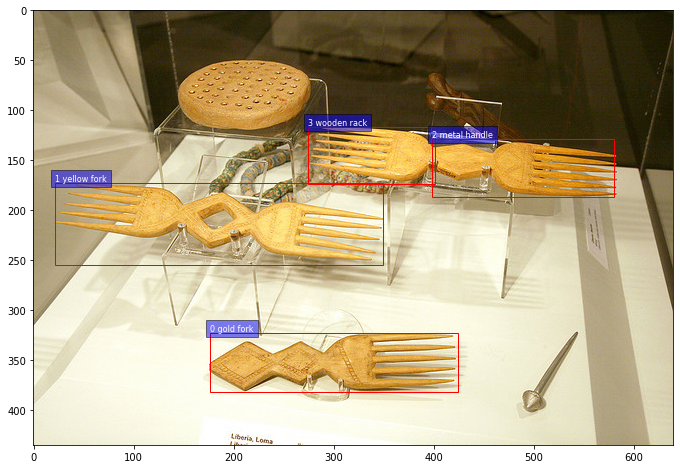

In [29]:
# load image and boxes
img = data[-12]  # {file_name, bboxes}, where bboxes = [bbox (xywh)]
im = plt.imread(osp.join('../datasets/coco/val2017', img['file_name']))
plt.rcParams['figure.figsize'] = (12, 8); plt.imshow(im)
# load detections
det = np.load("../output/extracted_features/features/"+img["file_name"]+'.npz')
bboxes = det['norm_bb']
bboxes[:, 0::2] *= det["image_w"]
bboxes[:, 1::2] *= det["image_h"]
bboxes[:,2] = bboxes[:,2] - bboxes[:,0] + 1
bboxes[:,3] = bboxes[:,3] - bboxes[:,1] + 1
for i in range(len(bboxes)):
    bbox = bboxes[i]
    object_cls = thing_classes[det["obj_probs"][i][:1600].argmax()]
    attribute_cls = attribute_classes[det["attr_probs"][i].argmax()]
    plt.gca().add_patch(
        plt.Rectangle((bbox[0], bbox[1]),
                      bbox[2],
                      bbox[3], fill=False,
                      edgecolor='red', linewidth=1)
            )
    plt.gca().text(bbox[0], bbox[1] - 2,
                '{} {:s} {:s}'.format(i,attribute_cls,object_cls),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=8, color='white')
plt.show()